<a href="https://colab.research.google.com/github/mzagoska/tensor-contraction/blob/master/Tensor_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа
Загоска Максим, группа М80-107-22


# Условие:
Имеются 5 тезоров:A,B,C,D,E, которые соединены как на рисунке.
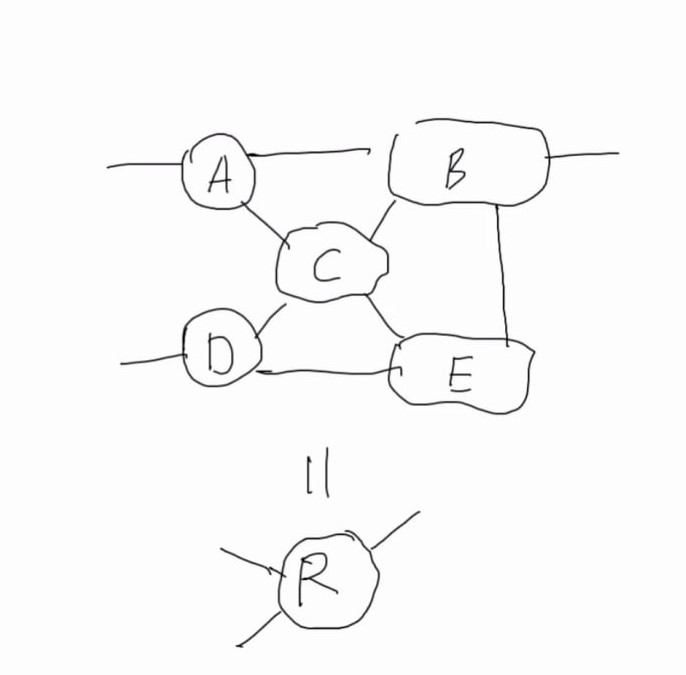

**Задача**: осуществить свертку и выполнить ее 3мя способами:

1)свернуть,используя цикл for

2)вручную используя функции reshape, матричное произведение

3)использовать пакет ncon

Сравнить эти способы по:

a) объему написания кода

б) по времени исполнения

в) проверить, что эти способы являются равнозначными(сравнения тензоров можно произвести с помощью пакета numpy)

**Итогом свертки будет некий тензор R валентности 3**

In [ ]:
! pip install  ncon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from ncon import ncon
import time

In [ ]:
I1 = 8
A1 = 8
F1 = 8

k1 = 1
k2 = 2
k3 = 3
k4 = 4

j = 5
l1 = 6
m1 = 7

A = np.random.uniform(-1,1,(I1,j ,k1)) # тензор А (I,j,k1)
B = np.random.uniform(-1,1,(j ,F1,l1,k2)) # тензор B (j,F,l1,k2)

C = np.random.uniform(-1,1,(k1,k2,k3,k4)) # тензор C (k1,k2,k3,k4)

D = np.random.uniform(-1,1, (A1,k3,m1)) # тензор D (A1,k3,m1)
E = np.random.uniform(-1,1,(m1,k4,l1)) # тензор E (m1,k4,l1)

print(f'A.shape {A.shape }')
print(f'B.shape {B.shape }')
print(f'C.shape {C.shape }')
print(f'D.shape {D.shape }')
print(f'E.shape {B.shape }')

A.shape (8, 5, 1)
B.shape (5, 8, 6, 2)
C.shape (1, 2, 3, 4)
D.shape (8, 3, 7)
E.shape (5, 8, 6, 2)


In [ ]:
# проводим свертку
# ВАРИАНТ 1
# ncon ncon(L, v, order=None, forder=None, check_indices=True):
start_ncon = time.time()
result_ncon = ncon(
    (
        A, 
        B, 
        C, 
        D, 
        E
     ), 
    (
        [-1, 2, 1], # тензор А (I,j,k1)
        [2, -2,5 , 3], # тензор B (j,F,l1,k2) 
        [1, 3, 6, 4], # тензор C (k1,k2,k3,k4) 
        [-3, 6, 7 ], # тензор D (A,k3,m1)
        [ 7, 4,5 ] # тензор E (m1,k4,l1)
     )
)
print(time.time() - start_ncon)
print(f'result_ncon.shape = {result_ncon.shape}')
print(result_ncon)

0.0031583309173583984
result_ncon.shape = (8, 8, 8)
[[[-8.07523195e-01  2.27767545e+00  8.74341744e+00 -5.81164015e+00
    6.51243046e-01 -9.67568472e+00  2.35347178e+00  4.81974838e-01]
  [ 3.16021996e+00  4.44360459e+00 -7.93541772e+00  1.41202652e+01
   -2.82359024e+00  1.04927247e+01 -3.07089301e+00 -1.96042503e+00]
  [-1.57804079e+00 -1.08529594e+01 -2.45758156e+00 -1.13282168e+01
   -4.14814263e+00 -5.69312588e+00 -8.97122719e-01  1.57907783e+00]
  [ 4.82593860e+00  1.07844250e+00  4.05458648e+00 -1.19547027e+01
   -1.79486770e+00 -5.21629601e+00 -4.89860456e+00  1.03160995e+00]
  [-7.19233729e+00 -6.30348703e+00 -1.93808646e-01  2.81877379e+00
   -4.27433358e+00 -1.48165767e+00  2.28154658e+00 -1.19969880e+00]
  [ 2.44455474e+00 -8.17351534e+00 -2.62600652e+00 -5.49710837e+00
   -5.23984466e+00 -6.88455911e+00  9.09906834e-01  7.56001153e+00]
  [ 1.19916484e-01  7.91896566e+00  5.11531710e+00  3.34790628e+00
    5.40132017e+00 -2.09961571e+00  1.15647501e+00  3.13351327e+00]
  [

In [ ]:
# ВАРИАНТ 2 
# np.tensordot np.tensordot(A, B, axes = (axes_A, axes_B))

start_tensordot  = time.time()
#####(1)#####
AC_1 = np.tensordot(
    A,C, 
    axes=([2],[0])
)
print(f'AC_1.shape = {AC_1.shape}')
#####(2)#####
ACB_1 = np.tensordot(
    AC_1,B, 
    axes=([1,2],[0,-1])
)
print(f'ACB_1.shape = {ACB_1.shape}')
#####(3)#####
ACBE_1 = np.tensordot(
    ACB_1,E, 
    axes=([2,-1],[-2,-1])
)
print(f'ACBE_1.shape = {ACBE_1.shape}')
#####(4)#####
result_Tensordot = np.tensordot(
    ACBE_1,D, 
    axes=([1,-1],[-2,-1])
)


print(time.time() - start_tensordot,'\n')
print(f'result_Tensordot.shape = {result_Tensordot.shape}')
print(f'result_Tensordot = {result_Tensordot}')

#check
print(result_ncon - result_Tensordot)

AC_1.shape = (8, 5, 2, 3, 4)
ACB_1.shape = (8, 3, 4, 8, 6)
ACBE_1.shape = (8, 3, 8, 7)
0.004151344299316406 

result_Tensordot.shape = (8, 8, 8)
result_Tensordot = [[[-8.07523195e-01  2.27767545e+00  8.74341744e+00 -5.81164015e+00
    6.51243046e-01 -9.67568472e+00  2.35347178e+00  4.81974838e-01]
  [ 3.16021996e+00  4.44360459e+00 -7.93541772e+00  1.41202652e+01
   -2.82359024e+00  1.04927247e+01 -3.07089301e+00 -1.96042503e+00]
  [-1.57804079e+00 -1.08529594e+01 -2.45758156e+00 -1.13282168e+01
   -4.14814263e+00 -5.69312588e+00 -8.97122719e-01  1.57907783e+00]
  [ 4.82593860e+00  1.07844250e+00  4.05458648e+00 -1.19547027e+01
   -1.79486770e+00 -5.21629601e+00 -4.89860456e+00  1.03160995e+00]
  [-7.19233729e+00 -6.30348703e+00 -1.93808646e-01  2.81877379e+00
   -4.27433358e+00 -1.48165767e+00  2.28154658e+00 -1.19969880e+00]
  [ 2.44455474e+00 -8.17351534e+00 -2.62600652e+00 -5.49710837e+00
   -5.23984466e+00 -6.88455911e+00  9.09906834e-01  7.56001153e+00]
  [ 1.19916484e-01  7.9189

In [ ]:
# ВАРИАНТ 3 
start_FOR  = time.time()
#####(1)#####
AC_3 = np.zeros((I1,j ,k2,k3,k4)) #8 5 2 3 4
for i_1 in range(I1):
  for J_0 in range(j):
    for K_2 in range(k2):
      for K_3 in range(k3):
        for K_4 in range(k4):
          #sum 
          for sumIter in range(k1): 
            #print(sumIter)
            AC_3[i_1,J_0 ,K_2,K_3,K_4] = AC_3[i_1,J_0 ,K_2,K_3,K_4] +  \
            A[i_1][J_0][sumIter] * C[sumIter][K_2][K_3][K_4]
print(f"AC_3.shape = {AC_3.shape}")
#####(2)#####
ACB_3 = np.zeros((I1,k3,k4,F1,l1))
for i_1 in range(I1):
  for K_3 in range(k3):
    for K_4 in range(k4):
      for f_1 in range(F1):
        for L_1 in range(l1):
          #sum
          for sumIter1 in range(j):
            for sumIter2 in range(k2):  
                ACB_3[i_1,K_3,K_4,f_1,L_1] = ACB_3[i_1,K_3,K_4,f_1,L_1] + \
                 AC_3[i_1,sumIter1,sumIter2,K_3,K_4] * B[sumIter1 ,f_1,L_1,sumIter2]

print(f"ACB_3.shape = {ACB_3.shape}")
#####(3)#####
ACBE_3 = np.zeros((I1,k3,F1,m1)) #= (8, 3, 4, 8, 6)  ()
# ACB_3
for i_1 in range(I1):
  for K_3 in range(k3):
      for f_1 in range(F1):
            for M_1 in range(m1):
              for sumIter1 in range(k4):
                  for sumIter2 in range(l1):
                            ACBE_3[i_1,K_3,f_1,M_1] = ACBE_3[i_1,K_3,f_1,M_1] + \
                            ACB_3[i_1,K_3,sumIter1,f_1,sumIter2] * E[M_1,sumIter1,sumIter2]

print(f"ACBE_3.shape = {ACBE_3.shape}")
####(4)#####
result_For  = np.zeros((I1,F1,A1))
for i_1 in range(I1):
  for f_1 in range(F1):
    for a_1 in range(A1):
      for sumIter1 in range(k3):
          for sumIter2 in range(m1):  #D (A,k3,m1)
              result_For[i_1,f_1,a_1] =  result_For[i_1,f_1,a_1] + \
              ACBE_3[i_1,sumIter1,f_1,sumIter2] + D[a_1,sumIter1,sumIter2]

print(f"result_For.shape = {result_For.shape}")
print(time.time() - start_FOR,'\n')

#print(f'result_For = {result_For}')

#check
print(result_ncon - result_For)

AC_3.shape = (8, 5, 2, 3, 4)
ACB_3.shape = (8, 3, 4, 8, 6)
ACBE_3.shape = (8, 3, 8, 7)
result_For.shape = (8, 8, 8)
0.13408517837524414 

[[[-4.66313509e+00 -2.71982398e+00  3.46533080e+00 -1.12843804e+01
   -2.58883732e+00 -1.59436108e+01 -4.54869882e+00  1.79665479e+00]
  [ 1.44377762e+01  1.45792733e+01  1.91966378e+00  2.37806931e+01
    9.06949752e+00  1.93579668e+01  5.16010452e+00  1.44874231e+01]
  [-1.18248272e+00 -1.15992889e+01 -3.48449823e+00 -1.25497871e+01
   -3.13705304e+00 -7.70988194e+00 -3.54812336e+00  7.14492774e+00]
  [ 2.41189987e+00 -2.47748377e+00  2.18073007e-01 -1.59858698e+01
   -3.59337492e+00 -1.00426489e+01 -1.03592020e+01  3.78786306e+00]
  [-5.50436580e+00 -5.75740308e+00  7.16881093e-02  2.88961695e+00
   -1.97083056e+00 -2.20600031e+00  9.22959362e-01  5.65856453e+00]
  [ 8.96856001e+00 -2.79139761e+00  2.47552401e+00 -5.90231434e-01
    1.89969214e+00 -2.77286797e+00  4.38735339e+00  1.92543086e+01]
  [ 5.29402440e-01  7.18656408e+00  4.10232832e+00  

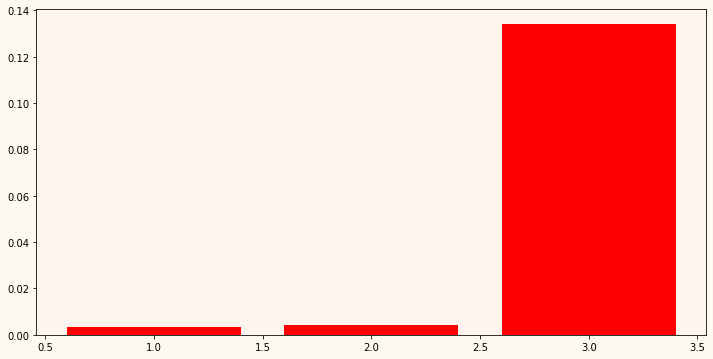

In [ ]:

import matplotlib.pyplot as plt

y = [0.0031583309173583984 ,0.004151344299316406, 0.13408517837524414]
x = [1, 2, 3]


fig, ax = plt.subplots()

ax.bar(x, y, color = 'red')


fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

# По итогам тестирования:
Самый практичный способ - ncon

Самый затратный через - цикл for